In [26]:
#작성자 최지은 2414320

#이 프로그램은 사용자가 자릿수를 입력하고, 그 자릿수로 임의로 생성된 숫자를 사용자가 맞추는 프로그램이다.
#num(자릿수)에 -1이 입력되면 프로그램은 종료된다.
#num조건은 3이상 5이하의 자연수이지만 6이상의 수가 입력돼도 게임이 동작되도록 했다.(--> 3이상의 자연수)


from graphics import * #graphics모듈을 불러옴
import random #random 모듈 불러옴

class NumbersBaseballGame:
    def __init__(self):
        self.win = GraphWin("Numbers Baseball Game", 400, 300) #창 이름이 'Numbers Baseball Gasme'이고 가로가 400, 세로가 300인 창 생성.
        self.win.setCoords(0, 0, 10, 10) #가로 세로 둘다 최소 0, 최대 10인 좌표 생성.
        self.gamestart_text() #메서드호출
        self.create_widgets() #메서드 호출
        self.start_game() # 메서드 호출

    def gamestart_text(self):
        #게임시작 문구
        self.start = Text(Point(5, 5),"Let's play the game of numbers baseball." )
        self.start.draw(self.win) #텍스트 그려넣음
        self.win.getMouse()  #마우스 클릭 대기
        self.start.setText("")#지우기

    def create_widgets(self): #창의 위젯들 만드는 메서드
        #num입력 프롬프트 생성
        self.prompt_num = Text(Point(5, 8.5),"Enter the num:" ) #(5,9.5)좌표에 'Enter the num' 텍스트 생성
        self.prompt_num.setSize(12) #글꼴 크기를 12로
        self.prompt_num.draw(self.win) #텍스트를 창에 그려 넣음
        
        #num 입력 박스 생성
        self.num_entry = Entry(Point(5, 7.5), 5) #(5,8.5)좌표에 5글자를 쓸 수 있는 입력 박스 생성
        self.num_entry.setSize(12) #입력 상자의 크기를 12로
        self.num_entry.draw(self.win) #입력상자를 창에 그려 넣음
        
        
        #메세지 출력 공간 생성
        self.message = Text(Point(5, 2.5), "") #(5,4)좌표에 빈 텍스트 생성
        self.message.setSize(12)#글꼴 크기를 12로
        self.message.draw(self.win)#텍스트를 창에 그려넣음

    def start_game(self):
        while True:
            self.win.getMouse()  #마우스 클릭 대기
            num = self.num_entry.getText() #사용자가 입력한 num을 얻음
            try: #예외처리
                num = int(num) 
                if num == -1:
                    self.message.setText("Quit the game.")
                    break
                elif num < 3: #3 미만의 수를 입력한 경우
                    self.message.setText("Enter the natural number between 3 and 5.")
                    self.win.getMouse()  #마우스 클릭 대기
                    self.reset_game1() #게임다시시작
                    continue
                else: # 3 이상의 자연수 입력 경우 (올바른 수 입력 경우)(입력가능한 숫자를 6자리 이상으로 확장)
                    self.inputNum(num) #inputNum(self,num) 메서드 호출
                    self.play_baseball(num) #play_baseball(self, num) 메서드 호출
                    break #루프에서 빠져나옴
            except ValueError: # 정수가 아닌 수를 입력한 경우
                self.message.setText("Enter the natural number between 3 and 5.")
                self.win.getMouse()  #마우스 클릭 대기
                self.reset_game1() #게임다시시작
                continue

    def inputNum(self,num):
         #inputNum입력 프롬프트 생성
        self.prompt_inputNum = Text(Point(5, 5.5), f"Enter the {num} digits(inpitNum):")#(5,6.5)좌표에 'Enter the digits number:' 텍스트 생성
        self.prompt_inputNum.setSize(12) #글꼴 크기를 12로
        self.prompt_inputNum.draw(self.win) #텍스트를 창에 그려 넣음
        
        #inputNum입력 박스 생성
        self.input_entry = Entry(Point(5, 4.5), 5) #(5,5.5)좌표에 5글자를 쓸 수 있는 입력 박스 생성
        self.input_entry.setSize(12) #입력 상자의 크기를 12로
        self.input_entry.draw(self.win) #입력상자를 창에 그려 넣음

    def play_baseball(self, num):
        # 랜덤으로 num 자릿수의 숫자 생성 (중복 없음)
        digits = list(range(1, 10)) # 1부터 9까지의 숫자 리스트 생성
        random.shuffle(digits) # 리스트를 무작위로 섞음
        ranNum = ''.join(map(str, digits[:num]))
                #자릿수만큼 리스트를 자르고 map함수를 이용하여 각 리스트의 요소를 문자열로 바꿈
                # 그 후 join함수를 이용해서 각 요소 사이에 아무것도 넣지 않고 단순히 이어붙여서 하나의 문자열로 결합함.
        print(ranNum) #디버깅을 위해서 출력


        while True:
            self.win.getMouse()  #마우스 클릭 대기
            inputNum = self.input_entry.getText() #사용자가 입력한 inputNum을 얻음
            try: #예외처리
                inputNum = int(inputNum)
                if not str(inputNum).isdigit() or len(str(inputNum)) != num: # inputNum이 숫자가 아니거나 num 자릿수가 아니면
                    self.message.setText(f"Please enter exactly {num} digits.")
                    continue #루프의 처음으로 돌아감
                
                # 게임 원리에 맞게 strike와 ball 수 세기
                inputDigits = list(map(int, str(inputNum))) # inputNum 각각의 숫자를 리스트로 만듦
                Strike = 0
                Ball = 0
                for i in range(num):
                    if inputDigits[i] == digits[i]: # 자릿수와 숫자가 똑같으면 strike
                        Strike += 1
                    elif inputDigits[i] in digits[:num]: # 자릿수는 다르지만 같은 숫자가 있으면 ball
                        Ball += 1

                # 결과 출력
                if ranNum == str(inputNum): # 무작위로 생성한 숫자와 사용자 입력 숫자가 같으면
                    self.message.setText(f"[result] {Strike} Strike {Ball} Ball\nCongratulations, you got it!")
                    self.win.getMouse()  #마우스 클릭 대기
                    break # 루프에서 빠져나옴
                else:
                    self.message.setText(f"[result] {Strike} Strike {Ball} Ball")
                    continue # 루프로 돌아감
            except ValueError: # 정수가 아닌 수를 입력한 경우
                self.message.setText(f"Please enter exactly {num} digits.")
                continue

        self.reset_game2() #메서드 호출

    def reset_game1(self):
        #초기화
         self.message.setText("")
         self.num_entry.undraw()
         self.prompt_num.setText("")
         self.gamestart_text() #게임시작문구
         self.create_widgets()
        

    def reset_game2(self):
        #초기화
        self.num_entry.undraw()
        self.input_entry.undraw()
        self.prompt_num.setText("")
        self.prompt_inputNum.setText("")
        self.message.setText("")
        #다시 게임 시작
        self.gamestart_text()
        self.create_widgets()
        self.start_game() 


if __name__ == "__main__":
    NumbersBaseballGame() #클래스 호출


719


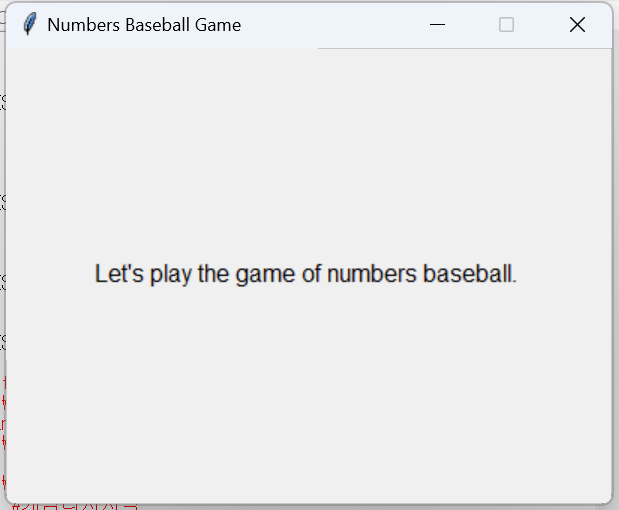

In [25]:
from IPython.display import Image
Image("1.png", width=300, height=300)

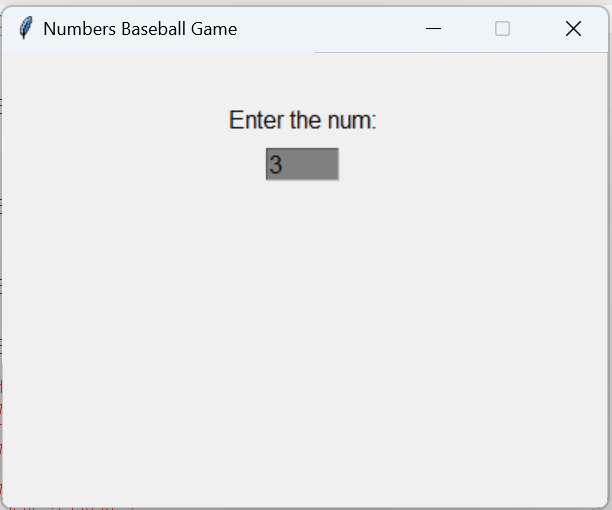

In [21]:
from IPython.display import Image
Image("2.png", width=300, height=300)

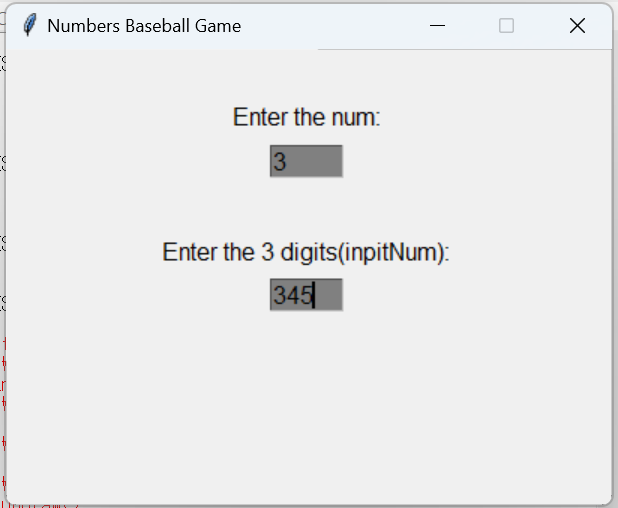

In [22]:
from IPython.display import Image
Image("3.png", width=300, height=300)

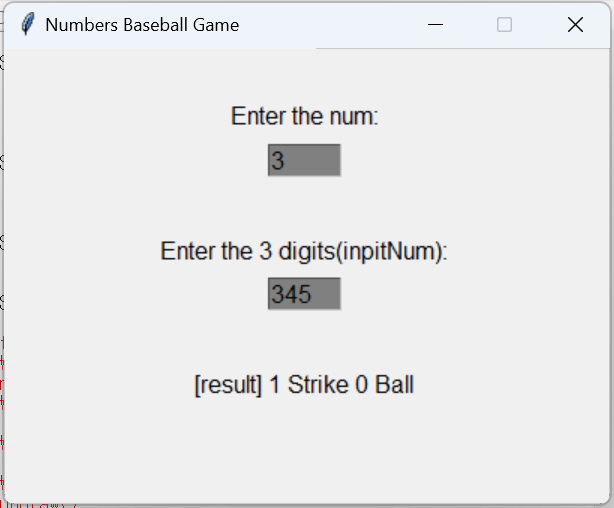

In [23]:
from IPython.display import Image
Image("4.png", width=300, height=300)